# ดัชนีพืชพรรณทางด้านรีโมทเซนซิ่ง
นำโค้ดมาจาก http://patrickgray.me/open-geo-tutorial/chapter_2_indices.html

ดัชนีผลต่างพืชพรรณ normalized difference vegetation index (NDVI) เป็นตัวชี้วัดอย่างง่ายในการนำมาใช้เพื่อวิเคราะห์การตรวจวัดค่าทางด้านการรับรู้ระยะไกล แสดงถึงการมีอยู่ของพืชพรรณที่เป็นสีเขียว มีช่วงค่าตั้งแต่ -1 ถึง 1 หากค่าเข้าใกล้ -1 แสดงถึงพืชที่น้ำ ในขณะที่ค่าอยู่ระหว่าง -0.1 ถึง 0.1 โดยทั่วงไปแสดงถึงพื้นที่แห้งแล้ง ดินทราย หรือพื้นดินที่ปกคลุมด้วยหิมะ ในขณะที่หากค่า NDVI มีค่าที่ต่ำ คือ อยู่ระหว่าง 0.2 ถึง 0.4  แสดงถึงบริเวณทุ่งหญ้าหรือพุ่มหญ้า ส่วนหากพบว่าค่า NDVI สูงมากกว่านั้นจนเข้าใกล้ แสดงถึงป่าในเขตร้อนหรือพืชพรรณที่อุดมสมบูรณ์ 

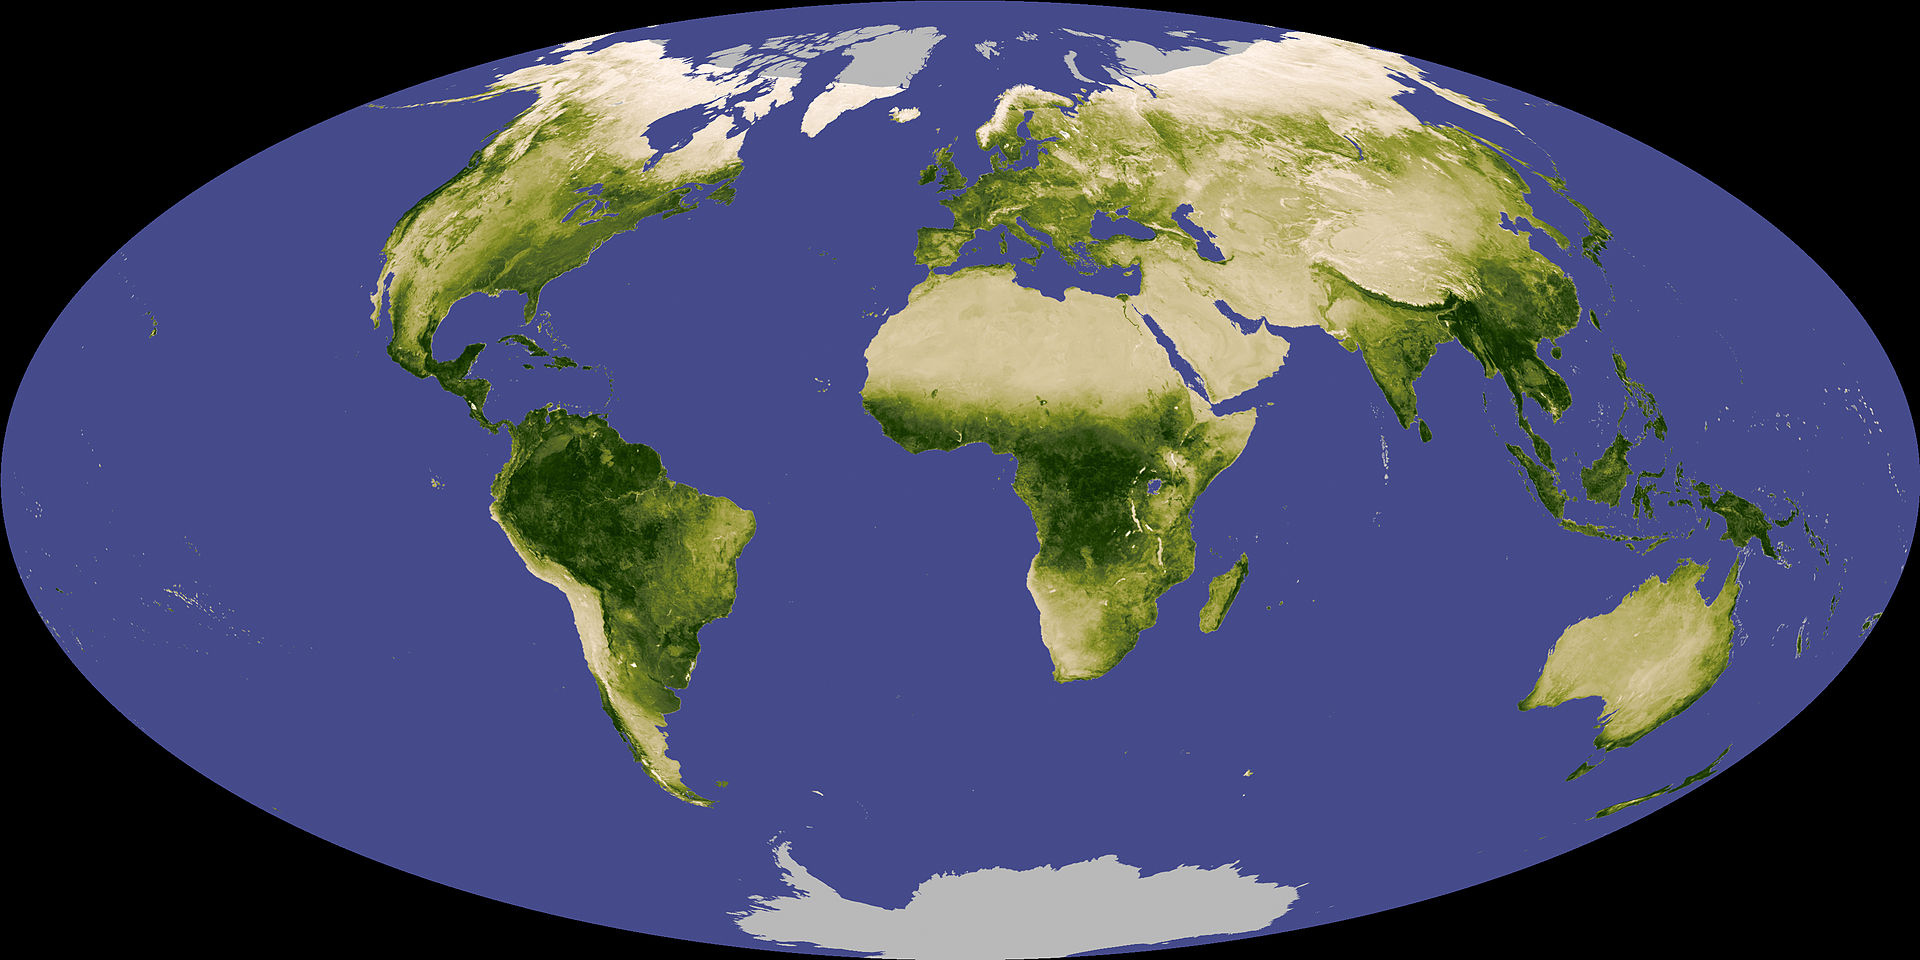

### สมการ NDVI

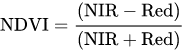

อ่านต่อ https://en.wikipedia.org/wiki/Normalized_difference_vegetation_index


### การคำนวณ 
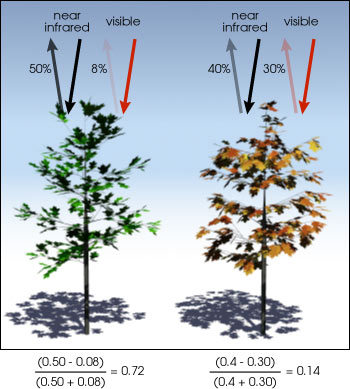

### นำเข้าแพคเกจ ไลบราลี่และโมดูลที่จะใช้

In [1]:
import numpy as np
import rasterio     
from rasterio.plot import show, show_hist # ฟังก์ชันใน rasterio ที่จะใช้พลอต

import matplotlib   
import matplotlib.pyplot as plt

%matplotlib inline  
import folium       # ใช้ folium สำหรับการทำแผนที่แบบ interactive



In [2]:
# ชื่อไฟล์
img_fp = './1data/phl_s2_clip_nu.tif'

# หากพบว่าไฟล์ที่ดาวน์โหลดมาเป็นไฟล์ที่แยกกัน แล้วต้องการรวมแบนด์กัน ให้ไปใช้โค้ด http://patrickgray.me/open-geo-tutorial/chapter_2_indices.html

In [3]:
# เปิดไฟล์
dataset = rasterio.open(img_fp)

In [4]:
#นับจำนวนแบนด์
dataset.count

13

In [5]:
dataset.shape

(474, 696)

In [6]:
# อ่านข้อมูลเข้ามาด้วยการใช้ read()
full_img = dataset.read()
#full_img.shape # bands, rows, cols

#เปลี่ยนข้อมูลที่นำเข้ามาให้อยู่ในรูป numpy array
sentinel_img = np.array(full_img, dtype=full_img[0].dtype)

# ตรวจสอบ shape ของราสเตอร์อาเรย์
sentinel_img.shape

(13, 474, 696)

In [7]:
# ตรวจสอบชนิดภาพ datatype
sentinel_img.dtype

dtype('uint16')

พบว่าเป็นแบบ  'uint16' ซึ่งจะใช้ไม่ได้กับไลบราลี่ในการจัดการข้อมูล เนื่องจากจะต้องเป็นชนิด 8 บิทเท่านั้นถึงจะประมวลผลได้

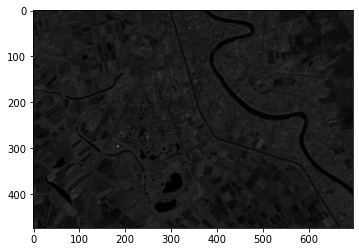

<AxesSubplot:>

In [8]:
# พลอตภาพ
show(sentinel_img[7], cmap='gray')

ลองพลอตภาพ 16 บิทดู

### แปลงข้อมูล 16 บิท เป็น 8 บิท

In [9]:
# เลือกแบนด์น้ำเงิน เขียว แดงและอินฟราเรดใกล้มาทำการแปลงด้วยการใช้ opencv
import cv2
im_bl=cv2.normalize(sentinel_img[1], dst=None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8U) #blue
im_gr=cv2.normalize(sentinel_img[2], dst=None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX,dtype=cv2.CV_8U) #green
im_rd=cv2.normalize(sentinel_img[3], dst=None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX,dtype=cv2.CV_8U) #red
im_nr=cv2.normalize(sentinel_img[7], dst=None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX,dtype=cv2.CV_8U) #nir

opencv https://docs.opencv.org/4.x/d6/d00/tutorial_py_root.html เป็นไลบราลีที่ใช้จัดการข้อมูลภาพ นิสิตควรศึกษาเนื่องจากเป็นเครื่องมือสำคัญในการประมวลผลข้อมูลภาพเชิงเลข Digital Image Processing (DIP) 

In [10]:
# ตรวจสอบชนิดของภาพ
im_nr.dtype

dtype('uint8')

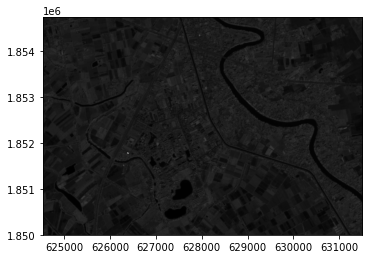

<AxesSubplot:>

In [11]:
# พลอตภาพ 8 บิท
show(im_nr, cmap='gray', transform=dataset.transform)

    ผลไม่ต่างจาก 16 บิท มองด้วยตาเปล่าไม่เห็น

### รวมแบนด์ภาพที่เลือกไว้ในลิสต์เปล่าที่สร้างไว้

In [12]:
# รวมแบนด์ในลิสต์
arrs = []
arrs.append(im_bl)
arrs.append(im_gr)
arrs.append(im_rd)
arrs.append(im_nr)

In [13]:
# แปลงเป็น numpy array
sentinel_img = np.array(arrs, dtype=np.uint8)


In [14]:
#ตรวจสอบชนิดข้อมูล
sentinel_img.dtype

dtype('uint8')

In [15]:
# ตรวจสอบ shape ของอาเรย์
sentinel_img.shape

(4, 474, 696)

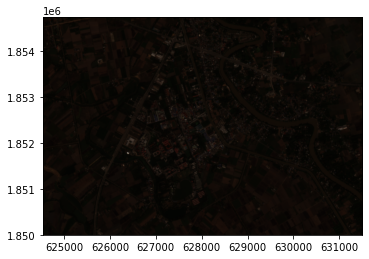

<AxesSubplot:>

In [16]:
# พลอตภาพด้วยการเลือกแบบ RGB [2,1,0]
show(sentinel_img[[2,1,0], :, :], transform=dataset.transform)

ภาพมืดเกินไป ลองพลอตดูฮิสโตแกรม

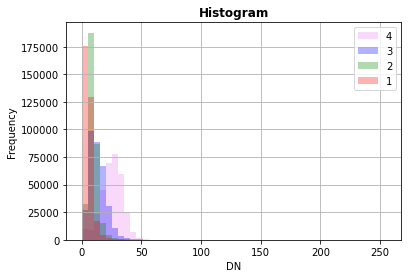

In [17]:
# พลอตดูฮิสโตแกรม
rasterio.plot.show_hist(sentinel_img, bins=50, histtype='stepfilled', lw=0.0, stacked=False, alpha=0.3, label=['1','2','3','4'])

### ทำการยืดค่าฮิสโตแกรมด้วยไลบราลี skimage

In [18]:
from skimage import exposure

# จาก https://scikit-image.org/docs/dev/auto_examples/color_exposure/plot_equalize.html นิสิตสามารถทดสอบการยืดค่าฮิสโตแกรมได้

In [19]:
#ยืดฮิสโตแกรมแบบ equalize_hist
#sentinel_img_st = exposure.equalize_hist(sentinel_img)    

# ยืดฮิสโตแกรมแบบ  Contrast stretching
#p2, p98 = np.percentile(sentinel_img, (2, 98))
#sentinel_img_st = exposure.rescale_intensity(sentinel_img, in_range=(p2, p98))

#  ยืดฮิสโตแกรมแบบ Adaptive Equalization
sentinel_img_st = exposure.equalize_adapthist(sentinel_img, clip_limit=0.03)

In [20]:
sentinel_img_st.shape

(4, 474, 696)

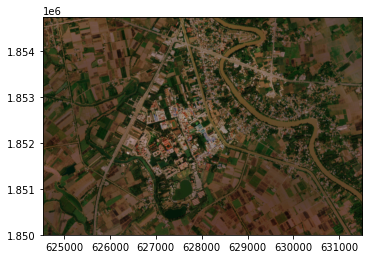

<AxesSubplot:>

In [21]:
# พลอตภาพ
show(sentinel_img_st[[2,1,0], :, :], transform=dataset.transform)

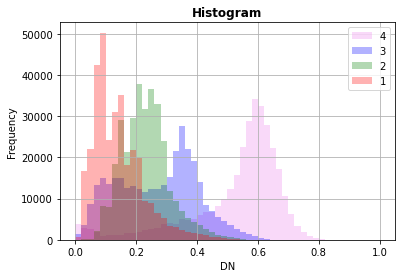

In [22]:
# พลอตฮิสโตแกรม
rasterio.plot.show_hist(sentinel_img_st, bins=50, histtype='stepfilled', lw=0.0, stacked=False, alpha=0.3, label=['1','2','3','4'])

In [23]:
# คืนค่าภาพที่ยืดให้เป็น 0-255 DN
st_img=sentinel_img_st*255

# st_img.rasterio.crs  ไม่มีค่า crs เนื่องจากเราได้ใช้ skimage ในการยืดภาพ จึงทำให้ข้อมูลกลายเป็น numpy array 
# หากต้องการฝัง crs ให้กับ st_img เพื่อส่งออกไฟล์ไปใช้ต่อต้องทำดังกระบวนการด้านล่าง
# https://gis.stackexchange.com/questions/279953/numpy-array-to-gtiff-using-rasterio-without-source-raster
# หรือ https://stackoverflow.com/questions/67020549/rasterio-equivalent-for-gdals-getprojection-and-getgeotransform
# หรือ อ่าน gdal https://gis.stackexchange.com/questions/37238/writing-numpy-array-to-raster-file

In [24]:
st_img.shape

(4, 474, 696)

นิสิตสามารถศึกษาการพลอตข้อมูลทั้งภาพและฮิสโตแกรมด้วย rasterio จาก https://rasterio.readthedocs.io/en/latest/topics/plotting.html

### คำนวณค่า NDVI

In [25]:
# เซตไม่ให้สนใจค่า error ที่เกิดจากการมีจุดภาพ NaN 
np.seterr(divide='ignore', invalid='ignore')

bandNIR = sentinel_img[3] # แบนด์ 8 หรืออินฟราเรดใกล้ของเซนติเนล 2
bandRed = sentinel_img[2] # แบนด์ 3 หรือแบนด์สีแดง

In [26]:
# ในไพธอนหากนำจำนวนเต็มมาหารกัน จะทำให้ได้ค่าจำนวนเต็ม ดังนั้นเราต้องระบุให้เป็น float เพื่อจะได้ให้ผลลัพธ์ ndvi เป็น float
ndvi = (bandNIR.astype(float)-bandRed.astype(float))/(bandNIR.astype(float)+bandRed.astype(float))

ตรวจดูค่าสถิติของ NDVI

In [27]:
print('\nMax NDVI: {m}'.format(m=ndvi.max()))
print('Mean NDVI: {m}'.format(m=ndvi.mean()))
print('Median NDVI: {m}'.format(m=np.median(ndvi)))
print('Min NDVI: {m}'.format(m=ndvi.min()))


Max NDVI: 1.0
Mean NDVI: 0.2846998671975119
Median NDVI: 0.2631578947368421
Min NDVI: -1.0


### พลอตผลลัพธ์ NDVI

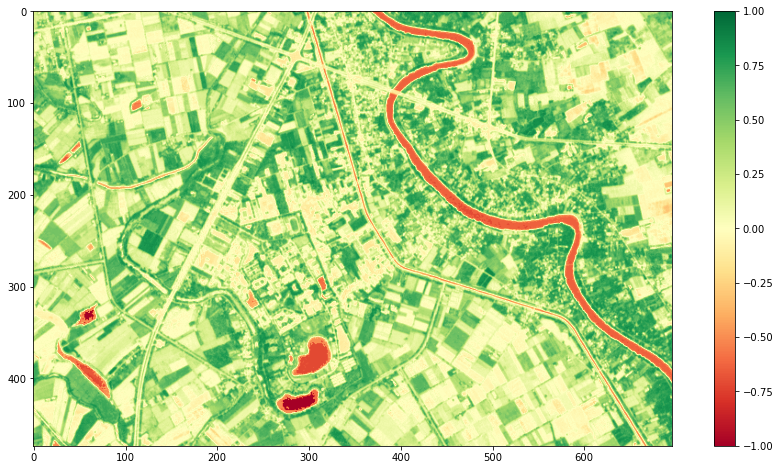

In [28]:
#show(ndvi, transform=dataset.transform, cmap="RdYlGn")

# หรือจะพลอตด้วยการใช้ matplotlib
fig, ax = plt.subplots(figsize=(15, 8))
plt.imshow(ndvi, cmap="RdYlGn")
plt.colorbar()
plt.show()

### พลอตโดยใช้ rasterio โดยเรียก colorbar ขึ้นมาด้วย มักมีปัญหาเลยแก้ด้วยด้านล่าง
โค้ดจาก https://stackoverflow.com/questions/61327088/rio-plot-show-with-colorbar

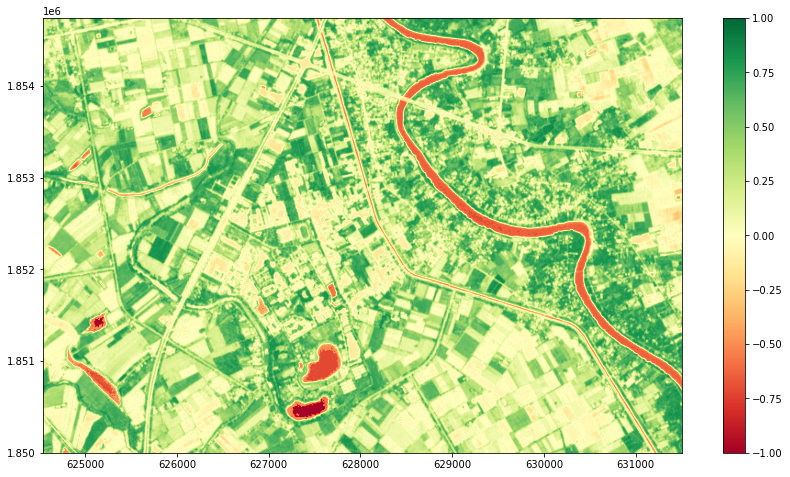

In [29]:
fig, ax = plt.subplots(figsize=(15, 8))

# พลอตโดยใช้ imshow เพื่อให้เป็นภาพที่ซ่อนเอาไว้ เพื่อที่จะนำไปใช้กับค่า colorbar 
image_hidden = ax.imshow(ndvi, 
                         cmap='RdYlGn', 
                         vmin=-1, 
                         vmax=1)

# พลอตภาพที่มีขนาด axis เดียวกัน ด้วยการเรียกใช้พารามิเตอร์ของ rasterio
im = rasterio.plot.show(ndvi, 
                      transform=dataset.transform,  # สามารถใส่ค่า transform พิกัดไปได้
                      ax=ax, 
                      cmap='RdYlGn',  
                      vmin=-1, 
                      vmax=1)


# เพิ่ม colorbar  ด้วยการใช้ของภาพที่ซ่อนไว้
fig.colorbar(image_hidden, ax=ax)

#### การพลอตข้อมูลดาวเทียมโดยไลบราลี earth_py ดังติวเตอร์เรียลของ earthLab https://www.earthdatascience.org/courses/use-data-open-source-python/multispectral-remote-sensing/landsat-in-Python/open-and-crop-data/ จัดการข้อมูลที่ง่ายกว่า 